# Lunar Lander Problem
The problem consists of an 8-dimensional continuous state space and a discrete action space. The four discrete
actions available are: do nothing, fire the left orientation engine, fire the main engine, fire the right orientation
engine. The landing pad is always at coordinates (0,0). Coordinates consist of the first two numbers in the state
vector. The total reward for moving from the top of the screen to the landing pad ranges from 100 - 140 points
varying on the lander placement on the pad. If the lander moves away from the landing pad it is penalized the
amount of reward that would be gained by moving towards the pad. An episode finishes if the lander crashes or
comes to rest, receiving an additional -100 or +100 points respectively. Each leg ground contact is worth +10
points. Firing the main engine incurs a -0.3 point penalty for each occurrence. Landing outside of the landing
pad is possible. Fuel is infinite, so, an agent could learn to fly and land on its first attempt. The problem is
considered solved when achieving a score of 200 points or higher on average over 100 consecutive runs.

## States
At each time step, a tuple of size 8 is given representing the 8 states: &emsp;  *(x,y,$v_{x}$,$v_{y}$,$\theta$,$v_{\theta}$,$leg_{L}$,$leg_{R}$)*
State in respective order:
- *x-coordinate* 
- *y-coordinate*
- *horizontal velocity ($v_{x}$)*
- *vertical velocity ($v_{y}$)*
- *angle of lander with respect to verical access*
- *angular velocity of the lander*
- *boolean for if left leg is touching ground*
- *boolean for if right leg is touching ground*

# Rewards
Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

# Import and Create Environment

In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display
# %matplotlib inline

# define seed for reproducibility
seed=222980

# initialize environment
env = gym.make('LunarLander-v2',render_mode="human")
env.action_space.seed(seed)

# get info on environment and seed
observation, _ = env.reset(seed=seed, options={})

# get environment info
num_actions = env.action_space.n 
num_inputs = env.observation_space.shape[0]

observation

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Taylor\OneDrive\Documents\Important Docs\ML\PersonalProjects\LunarLander\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Taylor\AppData\Local\Temp\ipykernel_17724\1868756228.py", line 3, in <module>
    import matplotlib.pyplot as plt
  File "c:\Users\Taylor\OneDrive\Documents\Important Docs\ML\PersonalProjects\LunarLander\venv\Lib\site-packages\matplotlib\__init__.py", line 1270, in <module>
    rcParams['backend'] = os.environ.get('MPLBACKEND')
    ~~~~~~~~^^^^^^^^^^^
  File "c:\Users\Taylor\OneDrive\Documents\Important Docs\ML\PersonalProjects\LunarLander\venv\Lib\site-packages\matplotlib\__init__.py", line 738, in __setitem__
    raise ValueError(f"Key {key}: {ve}") from None
ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtag

In [5]:
import torch
num_actions

NameError: name '_C' is not defined

In [1]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [1]:
num_inputs

NameError: name 'num_inputs' is not defined

# Demonstrate Untrained Simulation
- Take random actions.
- Unpack information after taking simulation step.
- Close environment

In [8]:
x_pos = np.zeros((100,))
y_pos = np.zeros((100,))
vx = np.zeros((100,))
vy = np.zeros((100,))
theta = np.zeros((100,))
theta_dot = np.zeros((100,))
rewards = np.zeros((100,))

for i in range(100):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    x_pos[i] = observation[0]
    y_pos[i] = observation[1]
    vx[i] = observation[2]
    vy[i] = observation[3]
    theta[i] = observation[4]
    theta_dot[i] = observation[5]                           

    if terminated or truncated:
        observation, info = env.reset()

env.close()

c:\Users\Taylor\OneDrive\Documents\Important Docs\ML\PersonalProjects\LunarRover\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# Plot simulation results
Note: when y-position hits zero, the simulation restarts (i.e. the rover has crashed)

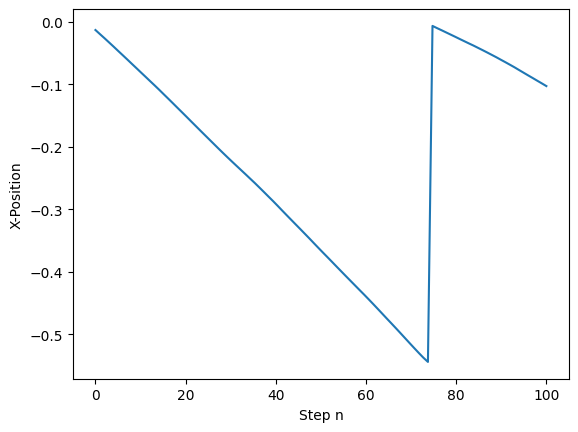

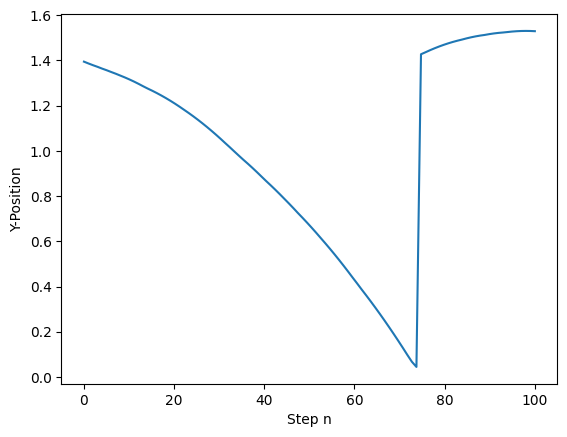

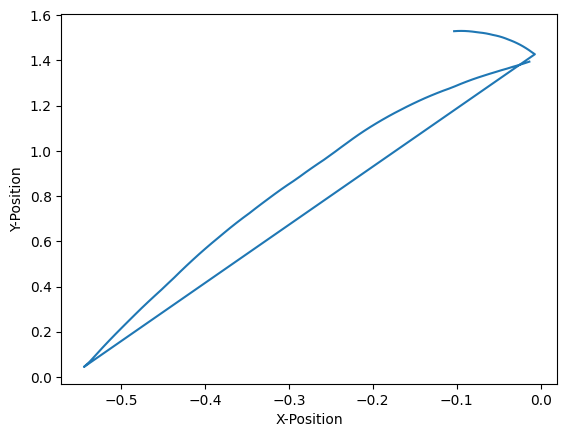

In [11]:
x = np.linspace(0,100,num=100)

# X-pos
plt.plot(x,x_pos)
plt.xlabel('Step n')
plt.ylabel('X-Position')
plt.show()

# Y-pos
plt.plot(x,y_pos)
plt.xlabel('Step n')
plt.ylabel('Y-Position')
plt.show()

# Y-pos vs X-pos 
plt.plot(x_pos,y_pos)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()

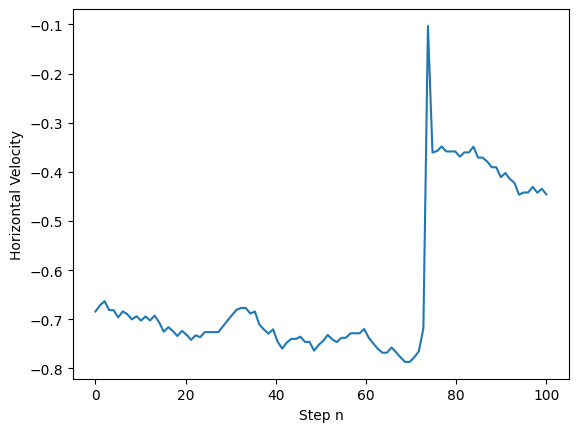

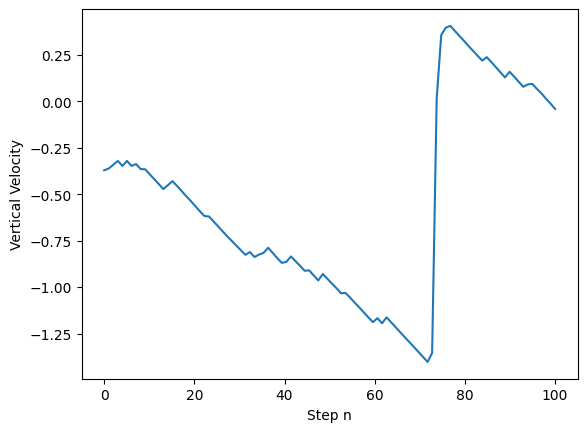

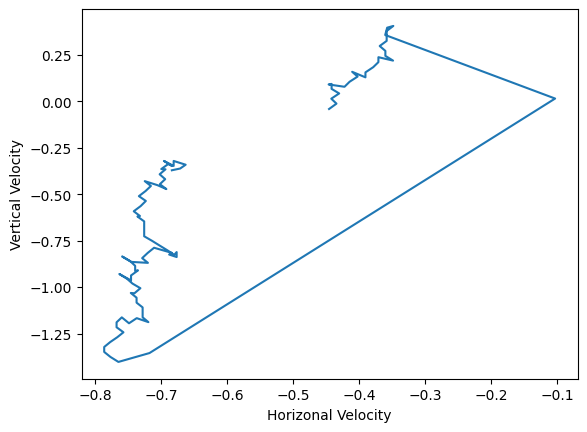

In [12]:

# Vx
plt.plot(x,vx)
plt.xlabel('Step n')
plt.ylabel('Horizontal Velocity')
plt.show()

# Vy
plt.plot(x,vy)
plt.xlabel('Step n')
plt.ylabel('Vertical Velocity')
plt.show()

# Vy vs. Vx
plt.plot(vx,vy)
plt.xlabel('Horizonal Velocity')
plt.ylabel('Vertical Velocity')
plt.show()

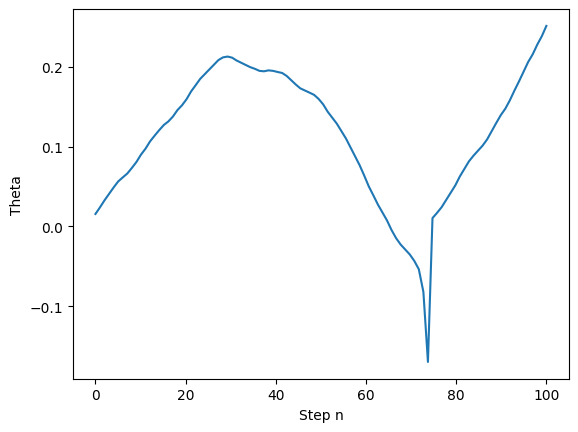

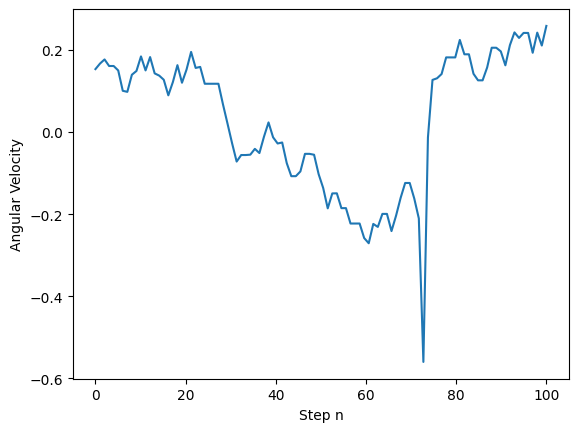

In [13]:
# Theta
plt.plot(x,theta)
plt.xlabel('Step n')
plt.ylabel('Theta')
plt.show()

# Angular velocity
plt.plot(x,theta_dot)
plt.xlabel('Step n')
plt.ylabel('Angular Velocity')
plt.show()

In [12]:
from sklearn.model_selection import ParameterGrid
params = {
           "layer_1_neurons": [32,64,128],
            "layer_2_neurons": [32,64,128],
            "layer_3_neurons": [0,32,64],
            "alpha": [0.001,0.01,0.1],
            "alpha_decay": [0.98,0.99,0.992],
            "learn_rate": [0.0001,0.001,0.01], #will not decay NN learning rate for now to reduce DOE
            "eps_decay": [0.98,0.992], # epsilon will always start at 1
            "buf_size": [2048,8192], # minimum buffer size will always be 2*batch_size
            "batch_size": [16,32,64,128],
            "target_update_epochs": [256,1024],
            "batch_update_epochs": [4,32]
        }

In [13]:
print(ParameterGrid(params)[0])

{'target_update_epochs': 256, 'learn_rate': 0.0001, 'layer_3_neurons': 0, 'layer_2_neurons': 32, 'layer_1_neurons': 32, 'eps_decay': 0.98, 'buf_size': 2048, 'batch_update_epochs': 4, 'batch_size': 16, 'alpha_decay': 0.98, 'alpha': 0.001}
